In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

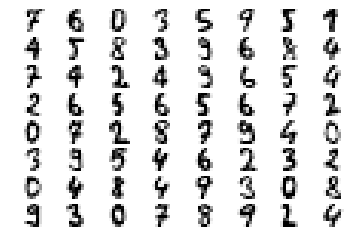

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 6)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T.tolist() 

In [7]:
classes = []
for i in range(2**(10-1) - 1):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/511".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/511
number of class1:162
number of class2:1455

 ****** Running generation 0 ****** 

Population's average fitness: 0.60475 stdev: 0.25796
Best fitness: 0.90971 - size: (2, 13) - species 1 - id 95
Average adjusted fitness: 0.498
Mean genetic distance 2.884, standard deviation 0.484
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 6.521 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.74643 stdev: 0.22891
Best fitness: 0.94805 - size: (3, 14) - species 2 - id 335
Average adjusted fitness: 0.634
Mean genetic distance 2.996, standard deviation 0.479
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 9.361 sec (7.941 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.77947 stdev: 0.20248
Best fitness: 0.95795 - size: (4, 16) - species 6 - id 521
Average adjusted fitness: 0.670
Mean genetic distance 3.003, standard deviation 0.450
Population of 200 members in 32 species
T

Mean genetic distance 3.090, standard deviation 0.485
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 17.873 sec (16.668 average)
running:4/511
number of class1:322
number of class2:1295

 ****** Running generation 0 ****** 

Population's average fitness: 0.58217 stdev: 0.19506
Best fitness: 0.85281 - size: (2, 13) - species 3 - id 152
Average adjusted fitness: 0.382
Mean genetic distance 2.863, standard deviation 0.475
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 14.386 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.69303 stdev: 0.18174
Best fitness: 0.85281 - size: (2, 13) - species 3 - id 152
Average adjusted fitness: 0.517
Mean genetic distance 2.914, standard deviation 0.475
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 15.029 sec (14.708 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.72358 stdev: 0.14784
Best fitness: 0.85281 

Population's average fitness: 0.59735 stdev: 0.09635
Best fitness: 0.78046 - size: (4, 17) - species 9 - id 903
Average adjusted fitness: 0.294
Mean genetic distance 3.150, standard deviation 0.496
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 17.837 sec (16.164 average)
running:8/511
number of class1:325
number of class2:1292

 ****** Running generation 0 ****** 

Population's average fitness: 0.56481 stdev: 0.21556
Best fitness: 0.85467 - size: (2, 13) - species 1 - id 34
Average adjusted fitness: 0.466
Mean genetic distance 2.911, standard deviation 0.534
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 14.211 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.65951 stdev: 0.18879
Best fitness: 0.89301 - size: (2, 14) - species 1 - id 368
Average adjusted fitness: 0.474
Mean genetic distance 3.040, standard deviation 0.569
Population of 202 members in 23 species
Total extinctions: 0
Generation time:

Mean genetic distance 3.074, standard deviation 0.502
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 16.328 sec (15.022 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61033 stdev: 0.08911
Best fitness: 0.75819 - size: (4, 17) - species 27 - id 973
Average adjusted fitness: 0.216
Mean genetic distance 3.086, standard deviation 0.496
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 16.622 sec (15.288 average)
running:12/511
number of class1:485
number of class2:1132

 ****** Running generation 0 ****** 

Population's average fitness: 0.52756 stdev: 0.15731
Best fitness: 0.77613 - size: (2, 13) - species 1 - id 135
Average adjusted fitness: 0.320
Mean genetic distance 2.861, standard deviation 0.462
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 13.687 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59343 stdev: 0.12999
Best fitness: 0.7761

Population's average fitness: 0.56116 stdev: 0.06989
Best fitness: 0.73593 - size: (4, 17) - species 22 - id 783
Average adjusted fitness: 0.233
Mean genetic distance 3.130, standard deviation 0.492
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 15.337 sec (14.835 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56809 stdev: 0.07265
Best fitness: 0.73593 - size: (4, 17) - species 23 - id 783
Average adjusted fitness: 0.218
Mean genetic distance 3.135, standard deviation 0.491
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 15.890 sec (15.011 average)
running:16/511
number of class1:326
number of class2:1291

 ****** Running generation 0 ****** 

Population's average fitness: 0.57604 stdev: 0.18084
Best fitness: 0.82189 - size: (2, 13) - species 4 - id 30
Average adjusted fitness: 0.356
Mean genetic distance 2.919, standard deviation 0.438
Population of 200 members in 29 species
Total extinctions

Mean genetic distance 3.042, standard deviation 0.465
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 15.391 sec (14.875 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59631 stdev: 0.08888
Best fitness: 0.75819 - size: (4, 16) - species 5 - id 544
Average adjusted fitness: 0.286
Mean genetic distance 3.103, standard deviation 0.456
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 15.786 sec (15.057 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60817 stdev: 0.08908
Best fitness: 0.75819 - size: (4, 16) - species 5 - id 544
Average adjusted fitness: 0.332
Mean genetic distance 3.149, standard deviation 0.441
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 16.550 sec (15.306 average)
running:20/511
number of class1:486
number of class2:1131

 ****** Running generation 0 ****** 

Population's average fitness: 0.53271 stdev: 0.15403
Best

Population's average fitness: 0.57760 stdev: 0.07387
Best fitness: 0.74026 - size: (5, 18) - species 3 - id 676
Average adjusted fitness: 0.171
Mean genetic distance 3.061, standard deviation 0.495
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 15.551 sec (14.852 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57958 stdev: 0.07715
Best fitness: 0.74026 - size: (5, 18) - species 14 - id 676
Average adjusted fitness: 0.240
Mean genetic distance 3.095, standard deviation 0.507
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 15.893 sec (15.061 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59445 stdev: 0.07778
Best fitness: 0.74830 - size: (6, 20) - species 14 - id 961
Average adjusted fitness: 0.273
Mean genetic distance 3.113, standard deviation 0.517
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 16.614 sec (15.319 average)
running:

Mean genetic distance 2.995, standard deviation 0.480
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 15.390 sec (14.600 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57370 stdev: 0.07893
Best fitness: 0.76809 - size: (4, 17) - species 28 - id 659
Average adjusted fitness: 0.176
Mean genetic distance 2.989, standard deviation 0.471
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 15.909 sec (14.927 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57777 stdev: 0.08401
Best fitness: 0.77365 - size: (5, 19) - species 6 - id 800
Average adjusted fitness: 0.218
Mean genetic distance 3.015, standard deviation 0.469
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 16.318 sec (15.205 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59454 stdev: 0.08475
Best fitness: 0.78169 - size: (4, 17) - species 28 - id 967
A

Population's average fitness: 0.55183 stdev: 0.08836
Best fitness: 0.71738 - size: (3, 16) - species 17 - id 535
Average adjusted fitness: 0.179
Mean genetic distance 3.030, standard deviation 0.503
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 16.317 sec (16.884 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55944 stdev: 0.09739
Best fitness: 0.75139 - size: (4, 16) - species 20 - id 586
Average adjusted fitness: 0.233
Mean genetic distance 3.036, standard deviation 0.523
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 17.292 sec (16.986 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57739 stdev: 0.09226
Best fitness: 0.75139 - size: (4, 16) - species 20 - id 586
Average adjusted fitness: 0.217
Mean genetic distance 3.082, standard deviation 0.517
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 16.358 sec (16.861 average)

 *****

Mean genetic distance 2.976, standard deviation 0.495
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 18.586 sec (17.564 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59386 stdev: 0.08047
Best fitness: 0.76623 - size: (3, 15) - species 6 - id 518
Average adjusted fitness: 0.297
Mean genetic distance 3.076, standard deviation 0.521
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 19.771 sec (18.300 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59695 stdev: 0.08902
Best fitness: 0.81014 - size: (3, 15) - species 6 - id 701
Average adjusted fitness: 0.290
Mean genetic distance 3.137, standard deviation 0.528
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 18.274 sec (18.293 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61385 stdev: 0.08301
Best fitness: 0.81014 - size: (3, 15) - species 6 - id 701
Ave

Population's average fitness: 0.54093 stdev: 0.06964
Best fitness: 0.74706 - size: (3, 15) - species 5 - id 244
Average adjusted fitness: 0.170
Mean genetic distance 2.945, standard deviation 0.457
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 18.240 sec (17.477 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56723 stdev: 0.07835
Best fitness: 0.74706 - size: (3, 15) - species 5 - id 244
Average adjusted fitness: 0.189
Mean genetic distance 2.978, standard deviation 0.466
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 18.275 sec (17.743 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58549 stdev: 0.08114
Best fitness: 0.74706 - size: (3, 15) - species 5 - id 244
Average adjusted fitness: 0.207
Mean genetic distance 3.043, standard deviation 0.483
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 18.450 sec (17.920 average)

 ****** R

Mean genetic distance 2.911, standard deviation 0.472
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 17.133 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54652 stdev: 0.07851
Best fitness: 0.75263 - size: (2, 13) - species 5 - id 43
Average adjusted fitness: 0.172
Mean genetic distance 2.974, standard deviation 0.506
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 19.378 sec (18.256 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56684 stdev: 0.09007
Best fitness: 0.75263 - size: (2, 13) - species 5 - id 43
Average adjusted fitness: 0.200
Mean genetic distance 2.995, standard deviation 0.523
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 20.221 sec (18.911 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58846 stdev: 0.08667
Best fitness: 0.75263 - size: (2, 13) - species 5 - id 43
Average adjusted fitnes


Population's average fitness: 0.48512 stdev: 0.09687
Best fitness: 0.72109 - size: (2, 13) - species 1 - id 107
Average adjusted fitness: 0.216
Mean genetic distance 2.968, standard deviation 0.478
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 14.306 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55697 stdev: 0.09317
Best fitness: 0.78973 - size: (3, 15) - species 5 - id 354
Average adjusted fitness: 0.264
Mean genetic distance 3.027, standard deviation 0.480
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 15.453 sec (14.880 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56670 stdev: 0.09844
Best fitness: 0.78973 - size: (3, 15) - species 4 - id 354
Average adjusted fitness: 0.259
Mean genetic distance 2.994, standard deviation 0.471
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 16.104 sec (15.288 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.49483 stdev: 0.05779
Best fitness: 0.65059 - size: (2, 13) - species 1 - id 30
Average adjusted fitness: 0.195
Mean genetic distance 2.879, standard deviation 0.450
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 14.308 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52779 stdev: 0.06219
Best fitness: 0.67223 - size: (2, 12) - species 13 - id 332
Average adjusted fitness: 0.175
Mean genetic distance 2.978, standard deviation 0.469
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 15.451 sec (14.880 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55047 stdev: 0.06842
Best fitness: 0.73036 - size: (4, 17) - species 4 - id 535
Average adjusted fitness: 0.178
Mean genetic distance 3.017, standard deviation 0.467
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 16.517 sec (15.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.48268 stdev: 0.10142
Best fitness: 0.75758 - size: (2, 13) - species 1 - id 20
Average adjusted fitness: 0.223
Mean genetic distance 2.818, standard deviation 0.464
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 17.425 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55047 stdev: 0.09534
Best fitness: 0.75758 - size: (2, 13) - species 1 - id 20
Average adjusted fitness: 0.245
Mean genetic distance 3.017, standard deviation 0.504
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 19.380 sec (18.403 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57086 stdev: 0.09919
Best fitness: 0.76067 - size: (4, 17) - species 14 - id 432
Average adjusted fitness: 0.246
Mean genetic distance 3.054, standard deviation 0.509
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 19.169 sec (18.65


 ****** Running generation 0 ****** 

Population's average fitness: 0.48357 stdev: 0.09873
Best fitness: 0.77304 - size: (2, 13) - species 3 - id 12
Average adjusted fitness: 0.228
Mean genetic distance 2.939, standard deviation 0.499
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 16.523 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53481 stdev: 0.10289
Best fitness: 0.77304 - size: (2, 13) - species 3 - id 12
Average adjusted fitness: 0.297
Mean genetic distance 3.030, standard deviation 0.513
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 18.820 sec (17.671 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55098 stdev: 0.11423
Best fitness: 0.80767 - size: (3, 15) - species 13 - id 520
Average adjusted fitness: 0.245
Mean genetic distance 3.105, standard deviation 0.506
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 18.858 sec (18.06


 ****** Running generation 0 ****** 

Population's average fitness: 0.45710 stdev: 0.14760
Best fitness: 0.75634 - size: (2, 13) - species 2 - id 191
Average adjusted fitness: 0.203
Mean genetic distance 2.865, standard deviation 0.442
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 15.423 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56897 stdev: 0.15706
Best fitness: 0.78602 - size: (3, 15) - species 23 - id 372
Average adjusted fitness: 0.358
Mean genetic distance 2.957, standard deviation 0.454
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 16.705 sec (16.064 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60354 stdev: 0.14987
Best fitness: 0.82127 - size: (4, 16) - species 10 - id 525
Average adjusted fitness: 0.374
Mean genetic distance 3.027, standard deviation 0.465
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 17.277 sec (16


 ****** Running generation 0 ****** 

Population's average fitness: 0.52726 stdev: 0.09211
Best fitness: 0.74954 - size: (2, 13) - species 8 - id 93
Average adjusted fitness: 0.298
Mean genetic distance 2.958, standard deviation 0.514
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 14.514 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57006 stdev: 0.08998
Best fitness: 0.76005 - size: (3, 15) - species 1 - id 308
Average adjusted fitness: 0.324
Mean genetic distance 3.030, standard deviation 0.534
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 15.597 sec (15.056 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58642 stdev: 0.09884
Best fitness: 0.76005 - size: (3, 15) - species 1 - id 308
Average adjusted fitness: 0.257
Mean genetic distance 3.038, standard deviation 0.548
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 16.086 sec (15.39

Population's average fitness: 0.50270 stdev: 0.06399
Best fitness: 0.69140 - size: (2, 13) - species 2 - id 164
Average adjusted fitness: 0.223
Mean genetic distance 2.905, standard deviation 0.496
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 16.023 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52516 stdev: 0.07292
Best fitness: 0.79777 - size: (3, 14) - species 2 - id 366
Average adjusted fitness: 0.333
Mean genetic distance 2.988, standard deviation 0.491
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 16.606 sec (16.315 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55044 stdev: 0.07646
Best fitness: 0.79777 - size: (3, 14) - species 4 - id 366
Average adjusted fitness: 0.192
Mean genetic distance 3.009, standard deviation 0.480
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 17.673 sec (16.767 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.50811 stdev: 0.06482
Best fitness: 0.69635 - size: (2, 13) - species 2 - id 137
Average adjusted fitness: 0.287
Mean genetic distance 2.908, standard deviation 0.468
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 17.344 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53241 stdev: 0.07398
Best fitness: 0.72789 - size: (2, 14) - species 5 - id 230
Average adjusted fitness: 0.225
Mean genetic distance 2.993, standard deviation 0.478
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 16.751 sec (17.048 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55161 stdev: 0.07632
Best fitness: 0.72789 - size: (2, 14) - species 5 - id 230
Average adjusted fitness: 0.212
Mean genetic distance 2.999, standard deviation 0.471
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 16.914 sec (17.0


 ****** Running generation 0 ****** 

Population's average fitness: 0.49229 stdev: 0.10015
Best fitness: 0.72233 - size: (2, 13) - species 6 - id 60
Average adjusted fitness: 0.201
Mean genetic distance 2.936, standard deviation 0.496
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 19.615 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55287 stdev: 0.09684
Best fitness: 0.77365 - size: (3, 15) - species 4 - id 356
Average adjusted fitness: 0.213
Mean genetic distance 3.041, standard deviation 0.507
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 21.381 sec (20.498 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56243 stdev: 0.09510
Best fitness: 0.77365 - size: (3, 15) - species 4 - id 356
Average adjusted fitness: 0.235
Mean genetic distance 3.032, standard deviation 0.488
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 22.991 sec (21.32


 ****** Running generation 0 ****** 

Population's average fitness: 0.50400 stdev: 0.07434
Best fitness: 0.80458 - size: (2, 13) - species 1 - id 127
Average adjusted fitness: 0.189
Mean genetic distance 2.829, standard deviation 0.477
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 17.684 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55046 stdev: 0.08502
Best fitness: 0.80458 - size: (2, 13) - species 1 - id 127
Average adjusted fitness: 0.295
Mean genetic distance 2.920, standard deviation 0.502
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 18.631 sec (18.157 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55430 stdev: 0.09634
Best fitness: 0.80458 - size: (2, 13) - species 4 - id 127
Average adjusted fitness: 0.312
Mean genetic distance 2.858, standard deviation 0.478
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 19.709 sec (18.6


 ****** Running generation 0 ****** 

Population's average fitness: 0.49314 stdev: 0.10076
Best fitness: 0.71800 - size: (2, 13) - species 2 - id 113
Average adjusted fitness: 0.186
Mean genetic distance 2.872, standard deviation 0.479
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 19.350 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53273 stdev: 0.11233
Best fitness: 0.79963 - size: (3, 15) - species 6 - id 278
Average adjusted fitness: 0.310
Mean genetic distance 3.015, standard deviation 0.479
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 20.762 sec (20.056 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56550 stdev: 0.11746
Best fitness: 0.80952 - size: (2, 14) - species 29 - id 488
Average adjusted fitness: 0.249
Mean genetic distance 3.062, standard deviation 0.480
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 23.061 sec (21.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47955 stdev: 0.10491
Best fitness: 0.73469 - size: (2, 13) - species 2 - id 125
Average adjusted fitness: 0.237
Mean genetic distance 2.922, standard deviation 0.455
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 23.198 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53814 stdev: 0.09709
Best fitness: 0.75943 - size: (2, 14) - species 1 - id 295
Average adjusted fitness: 0.217
Mean genetic distance 3.010, standard deviation 0.487
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 21.909 sec (22.553 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56511 stdev: 0.09237
Best fitness: 0.75943 - size: (2, 14) - species 1 - id 295
Average adjusted fitness: 0.217
Mean genetic distance 3.023, standard deviation 0.487
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 26.092 sec (23.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.46271 stdev: 0.15203
Best fitness: 0.78169 - size: (2, 13) - species 1 - id 60
Average adjusted fitness: 0.217
Mean genetic distance 2.906, standard deviation 0.466
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 21.900 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56521 stdev: 0.15739
Best fitness: 0.78169 - size: (2, 13) - species 1 - id 60
Average adjusted fitness: 0.339
Mean genetic distance 2.987, standard deviation 0.460
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 27.457 sec (24.678 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63153 stdev: 0.12518
Best fitness: 0.79839 - size: (3, 17) - species 16 - id 505
Average adjusted fitness: 0.369
Mean genetic distance 3.016, standard deviation 0.450
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 21.855 sec (23.73


 ****** Running generation 0 ****** 

Population's average fitness: 0.50190 stdev: 0.05995
Best fitness: 0.68336 - size: (2, 13) - species 3 - id 19
Average adjusted fitness: 0.157
Mean genetic distance 2.770, standard deviation 0.443
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 21.645 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53569 stdev: 0.05958
Best fitness: 0.71243 - size: (2, 13) - species 2 - id 296
Average adjusted fitness: 0.158
Mean genetic distance 2.854, standard deviation 0.471
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 19.701 sec (20.673 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54391 stdev: 0.07076
Best fitness: 0.71985 - size: (3, 14) - species 3 - id 525
Average adjusted fitness: 0.156
Mean genetic distance 2.906, standard deviation 0.496
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 20.286 sec (20.54


 ****** Running generation 0 ****** 

Population's average fitness: 0.48884 stdev: 0.09483
Best fitness: 0.72109 - size: (2, 13) - species 4 - id 164
Average adjusted fitness: 0.182
Mean genetic distance 2.830, standard deviation 0.458
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 19.097 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54151 stdev: 0.09843
Best fitness: 0.81633 - size: (2, 14) - species 4 - id 363
Average adjusted fitness: 0.247
Mean genetic distance 2.933, standard deviation 0.474
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 20.021 sec (19.559 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56951 stdev: 0.10201
Best fitness: 0.81633 - size: (2, 14) - species 4 - id 363
Average adjusted fitness: 0.327
Mean genetic distance 2.969, standard deviation 0.484
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 20.526 sec (19.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.48749 stdev: 0.09669
Best fitness: 0.72233 - size: (2, 13) - species 3 - id 139
Average adjusted fitness: 0.173
Mean genetic distance 2.857, standard deviation 0.490
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 19.899 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52439 stdev: 0.10337
Best fitness: 0.74521 - size: (2, 14) - species 1 - id 333
Average adjusted fitness: 0.249
Mean genetic distance 3.026, standard deviation 0.522
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 20.249 sec (20.074 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55976 stdev: 0.10118
Best fitness: 0.74521 - size: (2, 14) - species 1 - id 333
Average adjusted fitness: 0.271
Mean genetic distance 3.058, standard deviation 0.515
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 20.907 sec (20.3


 ****** Running generation 0 ****** 

Population's average fitness: 0.47256 stdev: 0.15131
Best fitness: 0.76190 - size: (2, 13) - species 5 - id 17
Average adjusted fitness: 0.233
Mean genetic distance 2.884, standard deviation 0.523
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 18.767 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55062 stdev: 0.15441
Best fitness: 0.76438 - size: (3, 15) - species 3 - id 327
Average adjusted fitness: 0.303
Mean genetic distance 3.019, standard deviation 0.514
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 20.421 sec (19.594 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60290 stdev: 0.13509
Best fitness: 0.79716 - size: (3, 15) - species 25 - id 514
Average adjusted fitness: 0.325
Mean genetic distance 3.061, standard deviation 0.508
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 21.707 sec (20.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.48009 stdev: 0.09127
Best fitness: 0.69697 - size: (2, 13) - species 5 - id 117
Average adjusted fitness: 0.189
Mean genetic distance 2.886, standard deviation 0.458
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 19.107 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52663 stdev: 0.09734
Best fitness: 0.69759 - size: (3, 15) - species 22 - id 354
Average adjusted fitness: 0.198
Mean genetic distance 2.962, standard deviation 0.466
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 24.351 sec (21.729 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56365 stdev: 0.08708
Best fitness: 0.70748 - size: (4, 15) - species 18 - id 465
Average adjusted fitness: 0.216
Mean genetic distance 2.991, standard deviation 0.482
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 26.760 sec (23


 ****** Running generation 0 ****** 

Population's average fitness: 0.46326 stdev: 0.14935
Best fitness: 0.80952 - size: (2, 13) - species 2 - id 81
Average adjusted fitness: 0.218
Mean genetic distance 2.994, standard deviation 0.499
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 21.128 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55623 stdev: 0.15120
Best fitness: 0.80952 - size: (2, 13) - species 2 - id 81
Average adjusted fitness: 0.309
Mean genetic distance 3.011, standard deviation 0.504
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 23.271 sec (22.199 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59144 stdev: 0.15280
Best fitness: 0.83117 - size: (3, 14) - species 2 - id 531
Average adjusted fitness: 0.363
Mean genetic distance 3.082, standard deviation 0.496
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 26.082 sec (23.494


 ****** Running generation 0 ****** 

Population's average fitness: 0.45619 stdev: 0.15069
Best fitness: 0.76190 - size: (2, 13) - species 4 - id 38
Average adjusted fitness: 0.245
Mean genetic distance 2.918, standard deviation 0.496
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 21.067 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54079 stdev: 0.15878
Best fitness: 0.76500 - size: (3, 13) - species 2 - id 295
Average adjusted fitness: 0.261
Mean genetic distance 3.020, standard deviation 0.486
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 22.214 sec (21.641 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58684 stdev: 0.15116
Best fitness: 0.79901 - size: (3, 13) - species 27 - id 537
Average adjusted fitness: 0.295
Mean genetic distance 3.042, standard deviation 0.485
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 23.350 sec (22.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.46045 stdev: 0.22770
Best fitness: 0.83426 - size: (2, 13) - species 1 - id 77
Average adjusted fitness: 0.341
Mean genetic distance 2.900, standard deviation 0.486
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 21.408 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60727 stdev: 0.20371
Best fitness: 0.85962 - size: (2, 14) - species 1 - id 370
Average adjusted fitness: 0.408
Mean genetic distance 3.048, standard deviation 0.509
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 24.441 sec (22.925 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65965 stdev: 0.18494
Best fitness: 0.85962 - size: (2, 14) - species 1 - id 370
Average adjusted fitness: 0.453
Mean genetic distance 3.104, standard deviation 0.501
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 27.182 sec (24.34


 ****** Running generation 0 ****** 

Population's average fitness: 0.51466 stdev: 0.09276
Best fitness: 0.71985 - size: (2, 13) - species 2 - id 187
Average adjusted fitness: 0.212
Mean genetic distance 2.866, standard deviation 0.438
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 26.641 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56830 stdev: 0.08693
Best fitness: 0.76005 - size: (3, 15) - species 2 - id 347
Average adjusted fitness: 0.233
Mean genetic distance 2.906, standard deviation 0.437
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 29.504 sec (28.072 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57163 stdev: 0.09771
Best fitness: 0.76005 - size: (3, 15) - species 5 - id 347
Average adjusted fitness: 0.282
Mean genetic distance 2.966, standard deviation 0.470
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 34.188 sec (30.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.50789 stdev: 0.05553
Best fitness: 0.68151 - size: (2, 13) - species 5 - id 85
Average adjusted fitness: 0.203
Mean genetic distance 2.815, standard deviation 0.436
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 24.940 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52630 stdev: 0.06194
Best fitness: 0.78541 - size: (3, 15) - species 2 - id 360
Average adjusted fitness: 0.228
Mean genetic distance 2.927, standard deviation 0.453
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 23.880 sec (24.410 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54963 stdev: 0.07445
Best fitness: 0.78541 - size: (3, 15) - species 2 - id 360
Average adjusted fitness: 0.210
Mean genetic distance 2.911, standard deviation 0.474
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 34.914 sec (27.91


 ****** Running generation 0 ****** 

Population's average fitness: 0.49913 stdev: 0.06330
Best fitness: 0.70006 - size: (2, 13) - species 3 - id 188
Average adjusted fitness: 0.181
Mean genetic distance 2.926, standard deviation 0.470
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 19.525 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53725 stdev: 0.07322
Best fitness: 0.73222 - size: (2, 14) - species 18 - id 368
Average adjusted fitness: 0.210
Mean genetic distance 3.012, standard deviation 0.483
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 20.940 sec (20.232 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55050 stdev: 0.07855
Best fitness: 0.78355 - size: (3, 15) - species 19 - id 461
Average adjusted fitness: 0.229
Mean genetic distance 3.080, standard deviation 0.494
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 22.830 sec (21


 ****** Running generation 0 ****** 

Population's average fitness: 0.48470 stdev: 0.09355
Best fitness: 0.69140 - size: (2, 13) - species 2 - id 164
Average adjusted fitness: 0.199
Mean genetic distance 2.867, standard deviation 0.465
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 20.099 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54506 stdev: 0.08569
Best fitness: 0.69759 - size: (2, 13) - species 2 - id 294
Average adjusted fitness: 0.241
Mean genetic distance 2.942, standard deviation 0.485
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 21.833 sec (20.966 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55166 stdev: 0.08721
Best fitness: 0.69821 - size: (4, 16) - species 2 - id 530
Average adjusted fitness: 0.205
Mean genetic distance 2.954, standard deviation 0.509
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 22.433 sec (21.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.49705 stdev: 0.06502
Best fitness: 0.69821 - size: (2, 13) - species 1 - id 95
Average adjusted fitness: 0.253
Mean genetic distance 2.945, standard deviation 0.472
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 20.222 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53588 stdev: 0.06495
Best fitness: 0.76933 - size: (3, 14) - species 4 - id 239
Average adjusted fitness: 0.138
Mean genetic distance 2.984, standard deviation 0.490
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 22.019 sec (21.121 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55091 stdev: 0.07273
Best fitness: 0.76933 - size: (3, 14) - species 13 - id 239
Average adjusted fitness: 0.193
Mean genetic distance 2.971, standard deviation 0.481
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 25.262 sec (22.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.48379 stdev: 0.08930
Best fitness: 0.74830 - size: (2, 13) - species 1 - id 108
Average adjusted fitness: 0.217
Mean genetic distance 2.947, standard deviation 0.482
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 20.751 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54005 stdev: 0.09019
Best fitness: 0.74830 - size: (2, 13) - species 2 - id 108
Average adjusted fitness: 0.243
Mean genetic distance 3.093, standard deviation 0.482
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 21.283 sec (21.017 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55780 stdev: 0.09096
Best fitness: 0.74830 - size: (2, 13) - species 2 - id 108
Average adjusted fitness: 0.246
Mean genetic distance 3.134, standard deviation 0.483
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 22.952 sec (21.6


 ****** Running generation 0 ****** 

Population's average fitness: 0.48689 stdev: 0.09250
Best fitness: 0.70934 - size: (2, 13) - species 3 - id 145
Average adjusted fitness: 0.180
Mean genetic distance 2.976, standard deviation 0.482
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 29.479 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53685 stdev: 0.09774
Best fitness: 0.74088 - size: (3, 15) - species 15 - id 288
Average adjusted fitness: 0.223
Mean genetic distance 3.052, standard deviation 0.469
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 30.749 sec (30.114 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56146 stdev: 0.09416
Best fitness: 0.77922 - size: (3, 16) - species 13 - id 501
Average adjusted fitness: 0.199
Mean genetic distance 3.040, standard deviation 0.486
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 31.371 sec (30


 ****** Running generation 0 ****** 

Population's average fitness: 0.45268 stdev: 0.14139
Best fitness: 0.76129 - size: (2, 13) - species 2 - id 115
Average adjusted fitness: 0.161
Mean genetic distance 2.895, standard deviation 0.479
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 32.367 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55228 stdev: 0.15533
Best fitness: 0.76129 - size: (2, 13) - species 5 - id 268
Average adjusted fitness: 0.317
Mean genetic distance 3.011, standard deviation 0.479
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 30.638 sec (31.502 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58092 stdev: 0.14811
Best fitness: 0.78108 - size: (3, 14) - species 15 - id 437
Average adjusted fitness: 0.301
Mean genetic distance 2.995, standard deviation 0.463
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 39.504 sec (34.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49990 stdev: 0.04966
Best fitness: 0.67161 - size: (2, 13) - species 2 - id 131
Average adjusted fitness: 0.176
Mean genetic distance 2.959, standard deviation 0.509
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 22.548 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52504 stdev: 0.05386
Best fitness: 0.67161 - size: (2, 13) - species 2 - id 131
Average adjusted fitness: 0.139
Mean genetic distance 3.110, standard deviation 0.503
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 26.020 sec (24.284 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53507 stdev: 0.05243
Best fitness: 0.67161 - size: (2, 13) - species 25 - id 131
Average adjusted fitness: 0.125
Mean genetic distance 3.156, standard deviation 0.497
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 25.455 sec (24.


 ****** Running generation 0 ****** 

Population's average fitness: 0.48908 stdev: 0.08233
Best fitness: 0.67780 - size: (2, 13) - species 3 - id 161
Average adjusted fitness: 0.222
Mean genetic distance 2.842, standard deviation 0.462
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 22.734 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52907 stdev: 0.08354
Best fitness: 0.69511 - size: (3, 15) - species 8 - id 370
Average adjusted fitness: 0.227
Mean genetic distance 2.915, standard deviation 0.474
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 25.711 sec (24.223 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55809 stdev: 0.08918
Best fitness: 0.72542 - size: (2, 13) - species 3 - id 488
Average adjusted fitness: 0.231
Mean genetic distance 3.000, standard deviation 0.498
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 25.987 sec (24.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.47725 stdev: 0.09274
Best fitness: 0.69264 - size: (2, 13) - species 1 - id 153
Average adjusted fitness: 0.202
Mean genetic distance 2.963, standard deviation 0.504
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 22.888 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54237 stdev: 0.08565
Best fitness: 0.73655 - size: (3, 15) - species 2 - id 315
Average adjusted fitness: 0.221
Mean genetic distance 3.067, standard deviation 0.493
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 24.489 sec (23.688 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55815 stdev: 0.08822
Best fitness: 0.73655 - size: (3, 15) - species 25 - id 315
Average adjusted fitness: 0.213
Mean genetic distance 3.124, standard deviation 0.473
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 27.479 sec (24.


 ****** Running generation 0 ****** 

Population's average fitness: 0.46658 stdev: 0.14068
Best fitness: 0.71676 - size: (2, 13) - species 2 - id 17
Average adjusted fitness: 0.242
Mean genetic distance 2.916, standard deviation 0.535
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 24.280 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57245 stdev: 0.14424
Best fitness: 0.73098 - size: (2, 14) - species 2 - id 361
Average adjusted fitness: 0.291
Mean genetic distance 2.996, standard deviation 0.518
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 33.836 sec (29.058 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57746 stdev: 0.13464
Best fitness: 0.74459 - size: (4, 16) - species 15 - id 412
Average adjusted fitness: 0.280
Mean genetic distance 3.040, standard deviation 0.521
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 32.323 sec (30.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.48594 stdev: 0.08693
Best fitness: 0.70130 - size: (2, 13) - species 3 - id 179
Average adjusted fitness: 0.177
Mean genetic distance 2.940, standard deviation 0.459
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 25.694 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54384 stdev: 0.08295
Best fitness: 0.70315 - size: (3, 15) - species 3 - id 365
Average adjusted fitness: 0.196
Mean genetic distance 3.006, standard deviation 0.482
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 28.595 sec (27.144 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56309 stdev: 0.07875
Best fitness: 0.73531 - size: (4, 16) - species 3 - id 475
Average adjusted fitness: 0.190
Mean genetic distance 2.993, standard deviation 0.454
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 29.343 sec (27.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.44872 stdev: 0.14319
Best fitness: 0.77365 - size: (2, 13) - species 3 - id 166
Average adjusted fitness: 0.235
Mean genetic distance 2.916, standard deviation 0.511
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 32.938 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57680 stdev: 0.13511
Best fitness: 0.77365 - size: (2, 13) - species 3 - id 166
Average adjusted fitness: 0.299
Mean genetic distance 2.960, standard deviation 0.495
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 33.436 sec (33.187 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59712 stdev: 0.12697
Best fitness: 0.77365 - size: (2, 13) - species 3 - id 166
Average adjusted fitness: 0.306
Mean genetic distance 3.040, standard deviation 0.519
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 36.828 sec (34.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.45500 stdev: 0.14929
Best fitness: 0.73717 - size: (2, 13) - species 2 - id 71
Average adjusted fitness: 0.207
Mean genetic distance 2.828, standard deviation 0.442
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 21.398 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56802 stdev: 0.14091
Best fitness: 0.77551 - size: (3, 15) - species 3 - id 248
Average adjusted fitness: 0.320
Mean genetic distance 2.923, standard deviation 0.452
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 22.026 sec (21.712 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58969 stdev: 0.14122
Best fitness: 0.79159 - size: (4, 15) - species 1 - id 542
Average adjusted fitness: 0.327
Mean genetic distance 2.952, standard deviation 0.441
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 22.884 sec (22.10


 ****** Running generation 0 ****** 

Population's average fitness: 0.44400 stdev: 0.20233
Best fitness: 0.80272 - size: (2, 13) - species 1 - id 5
Average adjusted fitness: 0.275
Mean genetic distance 2.902, standard deviation 0.491
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 20.229 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55359 stdev: 0.21266
Best fitness: 0.80396 - size: (3, 15) - species 16 - id 334
Average adjusted fitness: 0.345
Mean genetic distance 3.034, standard deviation 0.490
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 22.301 sec (21.265 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66907 stdev: 0.17732
Best fitness: 0.81818 - size: (3, 14) - species 10 - id 399
Average adjusted fitness: 0.433
Mean genetic distance 3.070, standard deviation 0.511
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 23.957 sec (22.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.49463 stdev: 0.07041
Best fitness: 0.73036 - size: (2, 13) - species 1 - id 101
Average adjusted fitness: 0.215
Mean genetic distance 2.924, standard deviation 0.454
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 19.449 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53977 stdev: 0.08978
Best fitness: 0.74521 - size: (2, 13) - species 4 - id 293
Average adjusted fitness: 0.218
Mean genetic distance 2.945, standard deviation 0.471
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 20.493 sec (19.971 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55400 stdev: 0.08602
Best fitness: 0.74521 - size: (2, 13) - species 18 - id 293
Average adjusted fitness: 0.251
Mean genetic distance 2.970, standard deviation 0.491
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 23.062 sec (21.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49033 stdev: 0.10453
Best fitness: 0.78788 - size: (2, 13) - species 4 - id 105
Average adjusted fitness: 0.194
Mean genetic distance 2.911, standard deviation 0.452
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 21.000 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53739 stdev: 0.10705
Best fitness: 0.78788 - size: (2, 13) - species 4 - id 105
Average adjusted fitness: 0.218
Mean genetic distance 2.980, standard deviation 0.471
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 21.859 sec (21.429 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55769 stdev: 0.11086
Best fitness: 0.80458 - size: (3, 15) - species 23 - id 535
Average adjusted fitness: 0.227
Mean genetic distance 3.006, standard deviation 0.484
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 28.060 sec (23.


 ****** Running generation 0 ****** 

Population's average fitness: 0.47696 stdev: 0.10385
Best fitness: 0.73346 - size: (2, 13) - species 2 - id 104
Average adjusted fitness: 0.303
Mean genetic distance 2.965, standard deviation 0.481
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 18.804 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53881 stdev: 0.09998
Best fitness: 0.76314 - size: (3, 15) - species 3 - id 265
Average adjusted fitness: 0.238
Mean genetic distance 3.066, standard deviation 0.492
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 20.518 sec (19.661 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56354 stdev: 0.10172
Best fitness: 0.76623 - size: (2, 15) - species 14 - id 522
Average adjusted fitness: 0.261
Mean genetic distance 3.023, standard deviation 0.481
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 25.949 sec (21.


 ****** Running generation 0 ****** 

Population's average fitness: 0.45646 stdev: 0.15413
Best fitness: 0.72975 - size: (2, 13) - species 1 - id 29
Average adjusted fitness: 0.223
Mean genetic distance 2.871, standard deviation 0.469
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 22.426 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56297 stdev: 0.14272
Best fitness: 0.75819 - size: (2, 13) - species 6 - id 221
Average adjusted fitness: 0.288
Mean genetic distance 3.053, standard deviation 0.492
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 24.461 sec (23.444 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60437 stdev: 0.13416
Best fitness: 0.78912 - size: (3, 16) - species 29 - id 532
Average adjusted fitness: 0.297
Mean genetic distance 3.108, standard deviation 0.476
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 27.949 sec (24.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.47556 stdev: 0.10419
Best fitness: 0.76562 - size: (2, 13) - species 3 - id 141
Average adjusted fitness: 0.234
Mean genetic distance 2.903, standard deviation 0.463
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 24.483 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54785 stdev: 0.10320
Best fitness: 0.76685 - size: (3, 14) - species 3 - id 365
Average adjusted fitness: 0.253
Mean genetic distance 2.983, standard deviation 0.502
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 26.308 sec (25.396 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56834 stdev: 0.11144
Best fitness: 0.78293 - size: (3, 15) - species 2 - id 500
Average adjusted fitness: 0.252
Mean genetic distance 2.986, standard deviation 0.516
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 26.097 sec (25.6


 ****** Running generation 0 ****** 

Population's average fitness: 0.46435 stdev: 0.15879
Best fitness: 0.79654 - size: (2, 13) - species 1 - id 138
Average adjusted fitness: 0.329
Mean genetic distance 2.918, standard deviation 0.491
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 24.778 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58044 stdev: 0.14846
Best fitness: 0.84601 - size: (2, 14) - species 22 - id 348
Average adjusted fitness: 0.377
Mean genetic distance 2.993, standard deviation 0.511
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 21.039 sec (22.909 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59927 stdev: 0.15839
Best fitness: 0.85158 - size: (4, 16) - species 14 - id 468
Average adjusted fitness: 0.400
Mean genetic distance 3.052, standard deviation 0.498
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 21.330 sec (22


 ****** Running generation 0 ****** 

Population's average fitness: 0.45130 stdev: 0.14998
Best fitness: 0.78169 - size: (2, 13) - species 4 - id 11
Average adjusted fitness: 0.263
Mean genetic distance 2.917, standard deviation 0.464
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 18.692 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55593 stdev: 0.14661
Best fitness: 0.78169 - size: (2, 13) - species 4 - id 11
Average adjusted fitness: 0.316
Mean genetic distance 2.985, standard deviation 0.465
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 19.379 sec (19.035 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60086 stdev: 0.14511
Best fitness: 0.82127 - size: (3, 16) - species 8 - id 538
Average adjusted fitness: 0.326
Mean genetic distance 3.020, standard deviation 0.475
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 26.169 sec (21.413


 ****** Running generation 0 ****** 

Population's average fitness: 0.45230 stdev: 0.21093
Best fitness: 0.83488 - size: (2, 13) - species 2 - id 2
Average adjusted fitness: 0.312
Mean genetic distance 2.973, standard deviation 0.481
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 22.759 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62761 stdev: 0.18824
Best fitness: 0.88497 - size: (3, 15) - species 21 - id 318
Average adjusted fitness: 0.448
Mean genetic distance 2.994, standard deviation 0.459
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 24.134 sec (23.446 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66864 stdev: 0.18370
Best fitness: 0.88497 - size: (3, 15) - species 21 - id 318
Average adjusted fitness: 0.450
Mean genetic distance 3.029, standard deviation 0.484
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 27.358 sec (24.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.48716 stdev: 0.09540
Best fitness: 0.71800 - size: (2, 13) - species 1 - id 55
Average adjusted fitness: 0.219
Mean genetic distance 2.843, standard deviation 0.445
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 19.272 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53629 stdev: 0.09224
Best fitness: 0.71800 - size: (2, 13) - species 8 - id 55
Average adjusted fitness: 0.231
Mean genetic distance 2.926, standard deviation 0.439
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 21.206 sec (20.239 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55809 stdev: 0.09044
Best fitness: 0.71800 - size: (2, 13) - species 6 - id 55
Average adjusted fitness: 0.258
Mean genetic distance 3.018, standard deviation 0.465
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 21.363 sec (20.614 


 ****** Running generation 0 ****** 

Population's average fitness: 0.46648 stdev: 0.14622
Best fitness: 0.76067 - size: (2, 13) - species 7 - id 159
Average adjusted fitness: 0.292
Mean genetic distance 2.857, standard deviation 0.460
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 18.912 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57549 stdev: 0.13673
Best fitness: 0.79468 - size: (3, 14) - species 5 - id 361
Average adjusted fitness: 0.305
Mean genetic distance 3.000, standard deviation 0.476
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 22.143 sec (20.528 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59773 stdev: 0.13975
Best fitness: 0.79468 - size: (3, 14) - species 22 - id 361
Average adjusted fitness: 0.322
Mean genetic distance 3.081, standard deviation 0.490
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 22.701 sec (21.


 ****** Running generation 0 ****** 

Population's average fitness: 0.46831 stdev: 0.15452
Best fitness: 0.76747 - size: (2, 13) - species 1 - id 188
Average adjusted fitness: 0.207
Mean genetic distance 2.964, standard deviation 0.541
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 27.677 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56140 stdev: 0.15693
Best fitness: 0.78602 - size: (2, 13) - species 2 - id 318
Average adjusted fitness: 0.278
Mean genetic distance 3.000, standard deviation 0.536
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 37.085 sec (32.381 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60021 stdev: 0.14656
Best fitness: 0.78850 - size: (3, 15) - species 7 - id 542
Average adjusted fitness: 0.368
Mean genetic distance 3.055, standard deviation 0.504
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 30.305 sec (31.6


 ****** Running generation 0 ****** 

Population's average fitness: 0.44177 stdev: 0.21829
Best fitness: 0.83550 - size: (2, 13) - species 3 - id 70
Average adjusted fitness: 0.264
Mean genetic distance 2.890, standard deviation 0.473
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 22.575 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59932 stdev: 0.19286
Best fitness: 0.84539 - size: (2, 14) - species 3 - id 349
Average adjusted fitness: 0.384
Mean genetic distance 2.967, standard deviation 0.480
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 22.829 sec (22.702 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62583 stdev: 0.20223
Best fitness: 0.84539 - size: (2, 14) - species 3 - id 349
Average adjusted fitness: 0.397
Mean genetic distance 2.981, standard deviation 0.472
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 25.407 sec (23.60


 ****** Running generation 0 ****** 

Population's average fitness: 0.45569 stdev: 0.15333
Best fitness: 0.75572 - size: (2, 13) - species 3 - id 134
Average adjusted fitness: 0.190
Mean genetic distance 2.920, standard deviation 0.478
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 19.565 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56157 stdev: 0.14530
Best fitness: 0.77675 - size: (2, 14) - species 4 - id 336
Average adjusted fitness: 0.271
Mean genetic distance 3.091, standard deviation 0.509
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 21.434 sec (20.500 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60312 stdev: 0.13483
Best fitness: 0.77675 - size: (2, 14) - species 4 - id 336
Average adjusted fitness: 0.292
Mean genetic distance 3.151, standard deviation 0.507
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 21.904 sec (20.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.46366 stdev: 0.22116
Best fitness: 0.84601 - size: (2, 13) - species 1 - id 34
Average adjusted fitness: 0.329
Mean genetic distance 2.974, standard deviation 0.505
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 20.142 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.64053 stdev: 0.18279
Best fitness: 0.84601 - size: (2, 13) - species 1 - id 34
Average adjusted fitness: 0.449
Mean genetic distance 3.010, standard deviation 0.507
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 21.765 sec (20.954 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64561 stdev: 0.19418
Best fitness: 0.84601 - size: (2, 13) - species 24 - id 34
Average adjusted fitness: 0.426
Mean genetic distance 2.986, standard deviation 0.532
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 22.708 sec (21.539


 ****** Running generation 0 ****** 

Population's average fitness: 0.42837 stdev: 0.21541
Best fitness: 0.81138 - size: (2, 13) - species 2 - id 82
Average adjusted fitness: 0.259
Mean genetic distance 2.901, standard deviation 0.520
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 19.767 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59522 stdev: 0.19725
Best fitness: 0.84663 - size: (2, 14) - species 15 - id 351
Average adjusted fitness: 0.419
Mean genetic distance 2.995, standard deviation 0.473
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 21.479 sec (20.623 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66702 stdev: 0.17231
Best fitness: 0.86085 - size: (3, 16) - species 15 - id 545
Average adjusted fitness: 0.474
Mean genetic distance 3.024, standard deviation 0.486
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 22.397 sec (21.

Mean genetic distance 3.099, standard deviation 0.477
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 24.121 sec (22.771 average)
running:255/511
number of class1:1454
number of class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.37694 stdev: 0.26226
Best fitness: 0.90167 - size: (2, 13) - species 2 - id 44
Average adjusted fitness: 0.256
Mean genetic distance 2.926, standard deviation 0.471
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 21.108 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61650 stdev: 0.28439
Best fitness: 0.90724 - size: (3, 15) - species 2 - id 354
Average adjusted fitness: 0.570
Mean genetic distance 3.018, standard deviation 0.468
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 20.996 sec (21.052 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.69590 stdev: 0.24540
Best fitness: 0.90724

Population's average fitness: 0.67189 stdev: 0.08105
Best fitness: 0.76190 - size: (4, 16) - species 5 - id 515
Average adjusted fitness: 0.364
Mean genetic distance 3.127, standard deviation 0.504
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 27.262 sec (26.519 average)
running:259/511
number of class1:644
number of class2:973

 ****** Running generation 0 ****** 

Population's average fitness: 0.51791 stdev: 0.07997
Best fitness: 0.71305 - size: (2, 13) - species 2 - id 184
Average adjusted fitness: 0.197
Mean genetic distance 2.920, standard deviation 0.517
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 21.587 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55878 stdev: 0.07479
Best fitness: 0.74830 - size: (2, 14) - species 2 - id 343
Average adjusted fitness: 0.240
Mean genetic distance 3.053, standard deviation 0.538
Population of 196 members in 22 species
Total extinctions: 0
Generation tim

Mean genetic distance 3.157, standard deviation 0.495
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 26.711 sec (25.374 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60102 stdev: 0.07522
Best fitness: 0.76129 - size: (4, 18) - species 33 - id 979
Average adjusted fitness: 0.249
Mean genetic distance 3.099, standard deviation 0.501
Population of 208 members in 33 species
Total extinctions: 0
Generation time: 23.426 sec (25.049 average)
running:263/511
number of class1:804
number of class2:813

 ****** Running generation 0 ****** 

Population's average fitness: 0.50164 stdev: 0.04850
Best fitness: 0.67038 - size: (2, 13) - species 2 - id 147
Average adjusted fitness: 0.225
Mean genetic distance 2.922, standard deviation 0.454
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 17.050 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52474 stdev: 0.05195
Best fitness: 0.6784

Population's average fitness: 0.59260 stdev: 0.09651
Best fitness: 0.79777 - size: (2, 13) - species 26 - id 347
Average adjusted fitness: 0.231
Mean genetic distance 3.063, standard deviation 0.500
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 19.066 sec (17.984 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60622 stdev: 0.09851
Best fitness: 0.79777 - size: (2, 13) - species 26 - id 347
Average adjusted fitness: 0.263
Mean genetic distance 3.077, standard deviation 0.511
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 18.998 sec (18.153 average)
running:267/511
number of class1:807
number of class2:810

 ****** Running generation 0 ****** 

Population's average fitness: 0.49757 stdev: 0.05645
Best fitness: 0.68460 - size: (2, 13) - species 3 - id 31
Average adjusted fitness: 0.196
Mean genetic distance 2.908, standard deviation 0.471
Population of 201 members in 24 species
Total extinctions

Mean genetic distance 3.120, standard deviation 0.498
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 18.735 sec (18.073 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55531 stdev: 0.06739
Best fitness: 0.74644 - size: (4, 16) - species 7 - id 780
Average adjusted fitness: 0.193
Mean genetic distance 3.166, standard deviation 0.498
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 18.880 sec (18.234 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56738 stdev: 0.07175
Best fitness: 0.74644 - size: (4, 16) - species 23 - id 780
Average adjusted fitness: 0.155
Mean genetic distance 3.171, standard deviation 0.504
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 21.887 sec (18.843 average)
running:271/511
number of class1:967
number of class2:650

 ****** Running generation 0 ****** 

Population's average fitness: 0.46596 stdev: 0.08024
Bes

Population's average fitness: 0.58048 stdev: 0.06848
Best fitness: 0.69264 - size: (4, 16) - species 15 - id 629
Average adjusted fitness: 0.192
Mean genetic distance 3.097, standard deviation 0.474
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 19.056 sec (17.745 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58178 stdev: 0.06919
Best fitness: 0.69264 - size: (4, 16) - species 15 - id 629
Average adjusted fitness: 0.184
Mean genetic distance 3.111, standard deviation 0.471
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 20.913 sec (18.379 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58349 stdev: 0.07204
Best fitness: 0.69573 - size: (5, 18) - species 15 - id 952
Average adjusted fitness: 0.210
Mean genetic distance 3.126, standard deviation 0.487
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 20.269 sec (18.694 average)
running

Mean genetic distance 2.986, standard deviation 0.500
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 20.683 sec (19.604 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.53880 stdev: 0.06000
Best fitness: 0.69821 - size: (3, 15) - species 24 - id 344
Average adjusted fitness: 0.215
Mean genetic distance 3.048, standard deviation 0.496
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 20.338 sec (19.788 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.54296 stdev: 0.05973
Best fitness: 0.69821 - size: (3, 15) - species 24 - id 344
Average adjusted fitness: 0.222
Mean genetic distance 3.110, standard deviation 0.497
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 22.624 sec (20.355 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.54932 stdev: 0.06077
Best fitness: 0.69821 - size: (3, 15) - species 24 - id 344


Population's average fitness: 0.53969 stdev: 0.06866
Best fitness: 0.71985 - size: (3, 15) - species 19 - id 502
Average adjusted fitness: 0.208
Mean genetic distance 3.067, standard deviation 0.522
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 23.365 sec (22.032 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55969 stdev: 0.06266
Best fitness: 0.71985 - size: (3, 15) - species 28 - id 502
Average adjusted fitness: 0.215
Mean genetic distance 3.115, standard deviation 0.519
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 20.587 sec (21.671 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56410 stdev: 0.07004
Best fitness: 0.71985 - size: (3, 15) - species 28 - id 502
Average adjusted fitness: 0.191
Mean genetic distance 3.125, standard deviation 0.510
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 22.042 sec (21.745 average)

 *****

Mean genetic distance 3.061, standard deviation 0.508
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 21.021 sec (19.700 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55088 stdev: 0.08954
Best fitness: 0.75634 - size: (2, 14) - species 5 - id 318
Average adjusted fitness: 0.224
Mean genetic distance 3.049, standard deviation 0.514
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 21.056 sec (20.152 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56977 stdev: 0.08300
Best fitness: 0.75634 - size: (2, 14) - species 5 - id 318
Average adjusted fitness: 0.211
Mean genetic distance 3.118, standard deviation 0.503
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 23.659 sec (21.028 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58140 stdev: 0.08366
Best fitness: 0.75634 - size: (2, 14) - species 5 - id 318
Ave

Population's average fitness: 0.56220 stdev: 0.08641
Best fitness: 0.70315 - size: (2, 13) - species 3 - id 45
Average adjusted fitness: 0.293
Mean genetic distance 3.042, standard deviation 0.474
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 19.727 sec (19.852 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57418 stdev: 0.08624
Best fitness: 0.70315 - size: (2, 13) - species 23 - id 45
Average adjusted fitness: 0.300
Mean genetic distance 3.015, standard deviation 0.489
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 20.905 sec (20.203 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58842 stdev: 0.08143
Best fitness: 0.73531 - size: (4, 15) - species 23 - id 673
Average adjusted fitness: 0.214
Mean genetic distance 3.028, standard deviation 0.481
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 22.086 sec (20.674 average)

 ****** R

Mean genetic distance 2.916, standard deviation 0.513
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 20.216 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55483 stdev: 0.07741
Best fitness: 0.74088 - size: (3, 15) - species 19 - id 356
Average adjusted fitness: 0.216
Mean genetic distance 2.914, standard deviation 0.509
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 20.812 sec (20.514 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56050 stdev: 0.07843
Best fitness: 0.74150 - size: (3, 16) - species 7 - id 513
Average adjusted fitness: 0.259
Mean genetic distance 2.897, standard deviation 0.486
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 22.335 sec (21.121 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57291 stdev: 0.08378
Best fitness: 0.80643 - size: (2, 10) - species 12 - id 662
Average adjusted f


 ****** Running generation 0 ****** 

Population's average fitness: 0.50361 stdev: 0.08018
Best fitness: 0.75572 - size: (2, 13) - species 1 - id 154
Average adjusted fitness: 0.227
Mean genetic distance 2.965, standard deviation 0.511
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 19.412 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54645 stdev: 0.09145
Best fitness: 0.79963 - size: (3, 15) - species 4 - id 299
Average adjusted fitness: 0.267
Mean genetic distance 3.030, standard deviation 0.514
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 20.880 sec (20.146 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56199 stdev: 0.09393
Best fitness: 0.79963 - size: (3, 15) - species 2 - id 299
Average adjusted fitness: 0.249
Mean genetic distance 3.050, standard deviation 0.500
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 23.143 sec (21.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.48164 stdev: 0.09664
Best fitness: 0.75634 - size: (2, 13) - species 3 - id 102
Average adjusted fitness: 0.226
Mean genetic distance 3.005, standard deviation 0.522
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 20.198 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54038 stdev: 0.09436
Best fitness: 0.76500 - size: (2, 13) - species 2 - id 340
Average adjusted fitness: 0.256
Mean genetic distance 3.095, standard deviation 0.502
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 20.422 sec (20.310 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55353 stdev: 0.10572
Best fitness: 0.77922 - size: (3, 13) - species 29 - id 494
Average adjusted fitness: 0.327
Mean genetic distance 3.104, standard deviation 0.495
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 21.865 sec (20.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50596 stdev: 0.05879
Best fitness: 0.67594 - size: (2, 13) - species 1 - id 21
Average adjusted fitness: 0.213
Mean genetic distance 2.888, standard deviation 0.455
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 15.541 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53746 stdev: 0.05727
Best fitness: 0.68213 - size: (3, 15) - species 1 - id 336
Average adjusted fitness: 0.161
Mean genetic distance 2.981, standard deviation 0.480
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 16.533 sec (16.037 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55497 stdev: 0.06830
Best fitness: 0.73779 - size: (4, 15) - species 11 - id 507
Average adjusted fitness: 0.228
Mean genetic distance 3.063, standard deviation 0.511
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 17.332 sec (16.4


 ****** Running generation 0 ****** 

Population's average fitness: 0.47930 stdev: 0.10015
Best fitness: 0.78726 - size: (2, 13) - species 8 - id 51
Average adjusted fitness: 0.193
Mean genetic distance 2.933, standard deviation 0.489
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 16.109 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54047 stdev: 0.10794
Best fitness: 0.80148 - size: (3, 14) - species 5 - id 304
Average adjusted fitness: 0.229
Mean genetic distance 3.008, standard deviation 0.487
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 16.498 sec (16.304 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56845 stdev: 0.10297
Best fitness: 0.80891 - size: (4, 15) - species 5 - id 528
Average adjusted fitness: 0.301
Mean genetic distance 3.088, standard deviation 0.509
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 17.767 sec (16.79


 ****** Running generation 0 ****** 

Population's average fitness: 0.47062 stdev: 0.09645
Best fitness: 0.76871 - size: (2, 13) - species 2 - id 126
Average adjusted fitness: 0.225
Mean genetic distance 2.858, standard deviation 0.518
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 15.857 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54148 stdev: 0.09558
Best fitness: 0.76871 - size: (2, 13) - species 1 - id 126
Average adjusted fitness: 0.220
Mean genetic distance 3.030, standard deviation 0.542
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 16.643 sec (16.250 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55490 stdev: 0.10684
Best fitness: 0.79097 - size: (3, 15) - species 5 - id 521
Average adjusted fitness: 0.303
Mean genetic distance 3.120, standard deviation 0.523
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 20.208 sec (17.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.47041 stdev: 0.14932
Best fitness: 0.80643 - size: (2, 13) - species 1 - id 81
Average adjusted fitness: 0.264
Mean genetic distance 2.857, standard deviation 0.470
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 15.656 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57652 stdev: 0.14356
Best fitness: 0.80643 - size: (2, 13) - species 1 - id 81
Average adjusted fitness: 0.342
Mean genetic distance 2.996, standard deviation 0.509
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 16.972 sec (16.314 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59969 stdev: 0.14887
Best fitness: 0.82127 - size: (4, 17) - species 17 - id 501
Average adjusted fitness: 0.310
Mean genetic distance 3.071, standard deviation 0.491
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 17.812 sec (16.81


 ****** Running generation 0 ****** 

Population's average fitness: 0.50956 stdev: 0.07782
Best fitness: 0.67161 - size: (2, 13) - species 3 - id 92
Average adjusted fitness: 0.196
Mean genetic distance 2.842, standard deviation 0.470
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 15.614 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56028 stdev: 0.06682
Best fitness: 0.67471 - size: (2, 13) - species 11 - id 276
Average adjusted fitness: 0.163
Mean genetic distance 2.982, standard deviation 0.521
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 16.544 sec (16.079 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56864 stdev: 0.06569
Best fitness: 0.68584 - size: (3, 15) - species 11 - id 542
Average adjusted fitness: 0.244
Mean genetic distance 3.084, standard deviation 0.502
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 17.306 sec (16.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49771 stdev: 0.05590
Best fitness: 0.70439 - size: (2, 13) - species 3 - id 80
Average adjusted fitness: 0.192
Mean genetic distance 2.954, standard deviation 0.505
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 13.401 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53167 stdev: 0.06064
Best fitness: 0.70686 - size: (3, 15) - species 21 - id 341
Average adjusted fitness: 0.201
Mean genetic distance 3.014, standard deviation 0.516
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 14.045 sec (13.723 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54832 stdev: 0.06895
Best fitness: 0.70748 - size: (2, 13) - species 23 - id 526
Average adjusted fitness: 0.211
Mean genetic distance 2.998, standard deviation 0.506
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 14.936 sec (14.

Population's average fitness: 0.49322 stdev: 0.05385
Best fitness: 0.67780 - size: (2, 13) - species 1 - id 88
Average adjusted fitness: 0.174
Mean genetic distance 2.885, standard deviation 0.490
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 13.072 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52450 stdev: 0.05960
Best fitness: 0.69821 - size: (2, 13) - species 17 - id 345
Average adjusted fitness: 0.153
Mean genetic distance 2.921, standard deviation 0.490
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 13.823 sec (13.448 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54400 stdev: 0.06309
Best fitness: 0.69821 - size: (2, 13) - species 17 - id 345
Average adjusted fitness: 0.207
Mean genetic distance 2.935, standard deviation 0.508
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 15.213 sec (14.036 average)

 ****** Running generatio

Population's average fitness: 0.47419 stdev: 0.08188
Best fitness: 0.64626 - size: (2, 13) - species 7 - id 85
Average adjusted fitness: 0.153
Mean genetic distance 2.983, standard deviation 0.545
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 12.759 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53946 stdev: 0.08363
Best fitness: 0.67842 - size: (3, 15) - species 21 - id 333
Average adjusted fitness: 0.171
Mean genetic distance 2.974, standard deviation 0.489
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 13.596 sec (13.177 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55391 stdev: 0.08368
Best fitness: 0.70315 - size: (4, 17) - species 25 - id 426
Average adjusted fitness: 0.204
Mean genetic distance 3.004, standard deviation 0.469
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 14.163 sec (13.506 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.50283 stdev: 0.04808
Best fitness: 0.66172 - size: (2, 13) - species 1 - id 63
Average adjusted fitness: 0.156
Mean genetic distance 2.911, standard deviation 0.499
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 13.492 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52258 stdev: 0.05378
Best fitness: 0.66172 - size: (2, 13) - species 5 - id 63
Average adjusted fitness: 0.170
Mean genetic distance 3.010, standard deviation 0.488
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 13.498 sec (13.495 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53395 stdev: 0.05522
Best fitness: 0.67285 - size: (3, 15) - species 5 - id 530
Average adjusted fitness: 0.129
Mean genetic distance 3.017, standard deviation 0.479
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 14.465 sec (13.819

Population's average fitness: 0.47080 stdev: 0.08674
Best fitness: 0.67532 - size: (2, 13) - species 2 - id 59
Average adjusted fitness: 0.164
Mean genetic distance 2.908, standard deviation 0.455
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 12.943 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54201 stdev: 0.08722
Best fitness: 0.73840 - size: (3, 15) - species 5 - id 269
Average adjusted fitness: 0.187
Mean genetic distance 2.948, standard deviation 0.462
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 13.647 sec (13.295 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56133 stdev: 0.08181
Best fitness: 0.75387 - size: (4, 16) - species 3 - id 499
Average adjusted fitness: 0.192
Mean genetic distance 3.032, standard deviation 0.488
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 14.671 sec (13.753 average)

 ****** Running generation 

Population's average fitness: 0.48577 stdev: 0.09180
Best fitness: 0.66790 - size: (2, 13) - species 2 - id 164
Average adjusted fitness: 0.168
Mean genetic distance 2.933, standard deviation 0.470
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 13.060 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53932 stdev: 0.09087
Best fitness: 0.68522 - size: (3, 14) - species 2 - id 358
Average adjusted fitness: 0.208
Mean genetic distance 2.997, standard deviation 0.484
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 13.780 sec (13.420 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55752 stdev: 0.08546
Best fitness: 0.70872 - size: (4, 16) - species 22 - id 527
Average adjusted fitness: 0.208
Mean genetic distance 3.041, standard deviation 0.490
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 14.474 sec (13.771 average)

 ****** Running generatio

Population's average fitness: 0.46374 stdev: 0.14103
Best fitness: 0.75881 - size: (2, 13) - species 4 - id 142
Average adjusted fitness: 0.180
Mean genetic distance 2.821, standard deviation 0.473
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 12.815 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56389 stdev: 0.13883
Best fitness: 0.75881 - size: (2, 13) - species 1 - id 142
Average adjusted fitness: 0.290
Mean genetic distance 2.939, standard deviation 0.525
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 13.478 sec (13.146 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58908 stdev: 0.14143
Best fitness: 0.75881 - size: (2, 13) - species 1 - id 142
Average adjusted fitness: 0.286
Mean genetic distance 3.041, standard deviation 0.527
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 14.365 sec (13.553 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.49771 stdev: 0.04838
Best fitness: 0.68707 - size: (2, 13) - species 5 - id 138
Average adjusted fitness: 0.147
Mean genetic distance 2.902, standard deviation 0.498
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 13.290 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53194 stdev: 0.05458
Best fitness: 0.68707 - size: (2, 13) - species 5 - id 138
Average adjusted fitness: 0.130
Mean genetic distance 3.005, standard deviation 0.484
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 13.699 sec (13.494 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54178 stdev: 0.05854
Best fitness: 0.68707 - size: (2, 13) - species 5 - id 138
Average adjusted fitness: 0.138
Mean genetic distance 3.072, standard deviation 0.489
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 14.441 sec (13.8

Population's average fitness: 0.48246 stdev: 0.08475
Best fitness: 0.68707 - size: (2, 13) - species 4 - id 175
Average adjusted fitness: 0.150
Mean genetic distance 3.005, standard deviation 0.502
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 12.926 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53221 stdev: 0.08593
Best fitness: 0.70934 - size: (3, 15) - species 25 - id 360
Average adjusted fitness: 0.206
Mean genetic distance 3.053, standard deviation 0.488
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 13.615 sec (13.270 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54990 stdev: 0.08661
Best fitness: 0.70934 - size: (3, 15) - species 25 - id 360
Average adjusted fitness: 0.212
Mean genetic distance 3.117, standard deviation 0.491
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 14.666 sec (13.736 average)

 ****** Running generati


Population's average fitness: 0.46961 stdev: 0.09168
Best fitness: 0.70501 - size: (2, 13) - species 1 - id 171
Average adjusted fitness: 0.203
Mean genetic distance 2.898, standard deviation 0.439
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 13.033 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55228 stdev: 0.10428
Best fitness: 0.74954 - size: (3, 14) - species 4 - id 286
Average adjusted fitness: 0.248
Mean genetic distance 2.994, standard deviation 0.429
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 13.879 sec (13.456 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57369 stdev: 0.10266
Best fitness: 0.74954 - size: (3, 15) - species 4 - id 293
Average adjusted fitness: 0.247
Mean genetic distance 3.066, standard deviation 0.463
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 15.055 sec (13.989 average)

 ****** Running generatio

Population's average fitness: 0.46154 stdev: 0.14744
Best fitness: 0.75758 - size: (2, 13) - species 3 - id 60
Average adjusted fitness: 0.203
Mean genetic distance 2.898, standard deviation 0.460
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 12.772 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55528 stdev: 0.15046
Best fitness: 0.75758 - size: (2, 13) - species 3 - id 60
Average adjusted fitness: 0.305
Mean genetic distance 2.987, standard deviation 0.473
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 13.560 sec (13.166 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60352 stdev: 0.13483
Best fitness: 0.75758 - size: (2, 13) - species 3 - id 60
Average adjusted fitness: 0.316
Mean genetic distance 2.981, standard deviation 0.463
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 14.171 sec (13.501 average)

 ****** Running generation 3 

Population's average fitness: 0.47856 stdev: 0.08688
Best fitness: 0.67904 - size: (2, 13) - species 2 - id 114
Average adjusted fitness: 0.138
Mean genetic distance 2.930, standard deviation 0.449
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 13.101 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54033 stdev: 0.08688
Best fitness: 0.67904 - size: (2, 13) - species 1 - id 114
Average adjusted fitness: 0.192
Mean genetic distance 3.043, standard deviation 0.451
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 13.577 sec (13.339 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55843 stdev: 0.08567
Best fitness: 0.70068 - size: (3, 16) - species 12 - id 503
Average adjusted fitness: 0.236
Mean genetic distance 3.044, standard deviation 0.449
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 14.526 sec (13.735 average)

 ****** Running generatio

Population's average fitness: 0.44290 stdev: 0.13903
Best fitness: 0.73840 - size: (2, 13) - species 2 - id 19
Average adjusted fitness: 0.231
Mean genetic distance 2.912, standard deviation 0.487
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 12.734 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56460 stdev: 0.13953
Best fitness: 0.77427 - size: (3, 14) - species 2 - id 381
Average adjusted fitness: 0.281
Mean genetic distance 3.025, standard deviation 0.481
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 13.753 sec (13.244 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60083 stdev: 0.13454
Best fitness: 0.79654 - size: (3, 15) - species 18 - id 527
Average adjusted fitness: 0.313
Mean genetic distance 2.998, standard deviation 0.474
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 14.542 sec (13.676 average)

 ****** Running generation

Population's average fitness: 0.46017 stdev: 0.15211
Best fitness: 0.72789 - size: (2, 13) - species 3 - id 90
Average adjusted fitness: 0.170
Mean genetic distance 2.786, standard deviation 0.440
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 14.449 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54210 stdev: 0.15206
Best fitness: 0.73160 - size: (2, 14) - species 17 - id 373
Average adjusted fitness: 0.272
Mean genetic distance 2.923, standard deviation 0.466
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 14.020 sec (14.234 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60210 stdev: 0.13545
Best fitness: 0.73840 - size: (4, 17) - species 3 - id 532
Average adjusted fitness: 0.302
Mean genetic distance 3.012, standard deviation 0.468
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 14.249 sec (14.239 average)

 ****** Running generation

Population's average fitness: 0.44491 stdev: 0.20507
Best fitness: 0.80952 - size: (2, 13) - species 2 - id 49
Average adjusted fitness: 0.277
Mean genetic distance 2.920, standard deviation 0.486
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 12.786 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61050 stdev: 0.21079
Best fitness: 0.81880 - size: (2, 13) - species 2 - id 350
Average adjusted fitness: 0.387
Mean genetic distance 2.965, standard deviation 0.465
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 13.624 sec (13.205 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63584 stdev: 0.20573
Best fitness: 0.85158 - size: (3, 14) - species 3 - id 499
Average adjusted fitness: 0.410
Mean genetic distance 2.991, standard deviation 0.482
Population of 206 members in 28 species
Total extinctions: 0
Generation time: 14.449 sec (13.620 average)

 ****** Running generation 

Population's average fitness: 0.52062 stdev: 0.08360
Best fitness: 0.70439 - size: (2, 13) - species 4 - id 77
Average adjusted fitness: 0.241
Mean genetic distance 2.803, standard deviation 0.460
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 12.957 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56790 stdev: 0.07902
Best fitness: 0.72975 - size: (3, 14) - species 4 - id 327
Average adjusted fitness: 0.171
Mean genetic distance 2.969, standard deviation 0.482
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 14.396 sec (13.677 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57484 stdev: 0.08353
Best fitness: 0.72975 - size: (3, 14) - species 6 - id 327
Average adjusted fitness: 0.202
Mean genetic distance 3.011, standard deviation 0.488
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 14.865 sec (14.073 average)

 ****** Running generation 

Population's average fitness: 0.50148 stdev: 0.05820
Best fitness: 0.68213 - size: (2, 13) - species 6 - id 129
Average adjusted fitness: 0.185
Mean genetic distance 2.978, standard deviation 0.524
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 12.821 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53090 stdev: 0.06282
Best fitness: 0.68213 - size: (2, 13) - species 6 - id 129
Average adjusted fitness: 0.160
Mean genetic distance 3.127, standard deviation 0.519
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 13.494 sec (13.158 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54780 stdev: 0.06682
Best fitness: 0.70006 - size: (3, 16) - species 4 - id 442
Average adjusted fitness: 0.154
Mean genetic distance 3.161, standard deviation 0.514
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 14.657 sec (13.657 average)

 ****** Running generation

Population's average fitness: 0.49876 stdev: 0.06289
Best fitness: 0.70501 - size: (2, 13) - species 1 - id 195
Average adjusted fitness: 0.216
Mean genetic distance 2.901, standard deviation 0.502
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 12.835 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53576 stdev: 0.07354
Best fitness: 0.70501 - size: (2, 13) - species 1 - id 195
Average adjusted fitness: 0.217
Mean genetic distance 3.038, standard deviation 0.470
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 14.220 sec (13.528 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55560 stdev: 0.07415
Best fitness: 0.76500 - size: (4, 17) - species 4 - id 520
Average adjusted fitness: 0.229
Mean genetic distance 3.004, standard deviation 0.468
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 14.335 sec (13.797 average)

 ****** Running generation

Population's average fitness: 0.48195 stdev: 0.08233
Best fitness: 0.75572 - size: (2, 13) - species 2 - id 46
Average adjusted fitness: 0.163
Mean genetic distance 2.896, standard deviation 0.460
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 13.056 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52472 stdev: 0.09230
Best fitness: 0.77242 - size: (2, 14) - species 2 - id 370
Average adjusted fitness: 0.266
Mean genetic distance 2.973, standard deviation 0.514
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 13.652 sec (13.354 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54623 stdev: 0.08832
Best fitness: 0.77242 - size: (2, 14) - species 2 - id 370
Average adjusted fitness: 0.266
Mean genetic distance 3.023, standard deviation 0.527
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 13.892 sec (13.533 average)

 ****** Running generation 

Population's average fitness: 0.50037 stdev: 0.04530
Best fitness: 0.63636 - size: (2, 13) - species 3 - id 172
Average adjusted fitness: 0.188
Mean genetic distance 2.825, standard deviation 0.456
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 13.289 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52561 stdev: 0.05163
Best fitness: 0.66481 - size: (3, 15) - species 1 - id 294
Average adjusted fitness: 0.156
Mean genetic distance 2.912, standard deviation 0.474
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 13.617 sec (13.453 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53952 stdev: 0.05784
Best fitness: 0.68893 - size: (4, 17) - species 13 - id 542
Average adjusted fitness: 0.159
Mean genetic distance 2.998, standard deviation 0.492
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 14.286 sec (13.731 average)

 ****** Running generatio

Population's average fitness: 0.47316 stdev: 0.08417
Best fitness: 0.70501 - size: (2, 13) - species 7 - id 119
Average adjusted fitness: 0.153
Mean genetic distance 2.939, standard deviation 0.471
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 12.939 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53922 stdev: 0.08375
Best fitness: 0.76933 - size: (3, 15) - species 1 - id 343
Average adjusted fitness: 0.179
Mean genetic distance 3.022, standard deviation 0.479
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 14.087 sec (13.513 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56290 stdev: 0.08932
Best fitness: 0.76933 - size: (3, 15) - species 30 - id 343
Average adjusted fitness: 0.190
Mean genetic distance 3.055, standard deviation 0.482
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 14.299 sec (13.775 average)

 ****** Running generatio

Population's average fitness: 0.46589 stdev: 0.09244
Best fitness: 0.77056 - size: (2, 13) - species 2 - id 53
Average adjusted fitness: 0.187
Mean genetic distance 2.967, standard deviation 0.522
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 12.910 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54146 stdev: 0.08816
Best fitness: 0.77056 - size: (2, 13) - species 2 - id 53
Average adjusted fitness: 0.247
Mean genetic distance 3.061, standard deviation 0.520
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 13.783 sec (13.346 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54557 stdev: 0.09136
Best fitness: 0.77056 - size: (2, 13) - species 2 - id 53
Average adjusted fitness: 0.209
Mean genetic distance 3.089, standard deviation 0.507
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 14.063 sec (13.585 average)

 ****** Running generation 3 

Population's average fitness: 0.45545 stdev: 0.13684
Best fitness: 0.70810 - size: (2, 13) - species 4 - id 113
Average adjusted fitness: 0.179
Mean genetic distance 2.874, standard deviation 0.455
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 12.858 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56952 stdev: 0.13846
Best fitness: 0.75077 - size: (3, 14) - species 12 - id 254
Average adjusted fitness: 0.288
Mean genetic distance 2.957, standard deviation 0.458
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 13.827 sec (13.343 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61718 stdev: 0.11408
Best fitness: 0.76685 - size: (4, 16) - species 11 - id 388
Average adjusted fitness: 0.300
Mean genetic distance 2.984, standard deviation 0.489
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 14.618 sec (13.768 average)

 ****** Running generati

Population's average fitness: 0.49521 stdev: 0.05769
Best fitness: 0.67532 - size: (2, 13) - species 1 - id 89
Average adjusted fitness: 0.192
Mean genetic distance 2.932, standard deviation 0.490
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 12.800 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53125 stdev: 0.05472
Best fitness: 0.69573 - size: (3, 15) - species 2 - id 222
Average adjusted fitness: 0.134
Mean genetic distance 3.025, standard deviation 0.500
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 13.863 sec (13.332 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52986 stdev: 0.05862
Best fitness: 0.72233 - size: (3, 15) - species 3 - id 487
Average adjusted fitness: 0.158
Mean genetic distance 3.048, standard deviation 0.487
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 14.151 sec (13.605 average)

 ****** Running generation 

Population's average fitness: 0.48904 stdev: 0.08318
Best fitness: 0.70130 - size: (2, 13) - species 1 - id 155
Average adjusted fitness: 0.218
Mean genetic distance 2.924, standard deviation 0.487
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 13.055 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54076 stdev: 0.08462
Best fitness: 0.74892 - size: (3, 15) - species 5 - id 290
Average adjusted fitness: 0.236
Mean genetic distance 2.987, standard deviation 0.520
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 13.585 sec (13.320 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56183 stdev: 0.09320
Best fitness: 0.77489 - size: (2, 14) - species 1 - id 515
Average adjusted fitness: 0.245
Mean genetic distance 3.011, standard deviation 0.511
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 14.489 sec (13.710 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.48266 stdev: 0.09609
Best fitness: 0.73346 - size: (2, 13) - species 1 - id 35
Average adjusted fitness: 0.261
Mean genetic distance 2.894, standard deviation 0.517
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 13.936 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53333 stdev: 0.09879
Best fitness: 0.77427 - size: (3, 15) - species 1 - id 372
Average adjusted fitness: 0.276
Mean genetic distance 3.010, standard deviation 0.541
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 14.427 sec (14.181 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56150 stdev: 0.09885
Best fitness: 0.77427 - size: (3, 15) - species 1 - id 372
Average adjusted fitness: 0.211
Mean genetic distance 3.071, standard deviation 0.520
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 14.718 sec (14.36

Population's average fitness: 0.47923 stdev: 0.14735
Best fitness: 0.73779 - size: (2, 13) - species 2 - id 56
Average adjusted fitness: 0.297
Mean genetic distance 2.956, standard deviation 0.505
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 13.177 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59155 stdev: 0.12820
Best fitness: 0.82622 - size: (2, 13) - species 12 - id 264
Average adjusted fitness: 0.362
Mean genetic distance 3.004, standard deviation 0.506
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 13.892 sec (13.535 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62042 stdev: 0.12399
Best fitness: 0.82622 - size: (2, 13) - species 12 - id 264
Average adjusted fitness: 0.456
Mean genetic distance 2.934, standard deviation 0.485
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 14.626 sec (13.898 average)

 ****** Running generatio

Population's average fitness: 0.48387 stdev: 0.08511
Best fitness: 0.65801 - size: (2, 13) - species 2 - id 145
Average adjusted fitness: 0.128
Mean genetic distance 3.003, standard deviation 0.491
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 13.072 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53122 stdev: 0.08351
Best fitness: 0.69202 - size: (3, 15) - species 6 - id 248
Average adjusted fitness: 0.242
Mean genetic distance 3.055, standard deviation 0.482
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 14.030 sec (13.551 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54639 stdev: 0.08149
Best fitness: 0.70563 - size: (4, 15) - species 31 - id 484
Average adjusted fitness: 0.139
Mean genetic distance 3.076, standard deviation 0.474
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 14.566 sec (13.889 average)

 ****** Running generatio

Population's average fitness: 0.46528 stdev: 0.14482
Best fitness: 0.76994 - size: (2, 13) - species 4 - id 24
Average adjusted fitness: 0.223
Mean genetic distance 2.881, standard deviation 0.474
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 13.035 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55923 stdev: 0.14954
Best fitness: 0.76994 - size: (2, 13) - species 5 - id 24
Average adjusted fitness: 0.314
Mean genetic distance 3.004, standard deviation 0.498
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 13.758 sec (13.397 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59516 stdev: 0.13878
Best fitness: 0.78541 - size: (3, 15) - species 5 - id 542
Average adjusted fitness: 0.335
Mean genetic distance 2.999, standard deviation 0.507
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 14.618 sec (13.804 average)

 ****** Running generation 3


Population's average fitness: 0.45706 stdev: 0.15470
Best fitness: 0.76685 - size: (2, 13) - species 1 - id 88
Average adjusted fitness: 0.220
Mean genetic distance 2.909, standard deviation 0.485
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 12.907 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55411 stdev: 0.15741
Best fitness: 0.80829 - size: (3, 15) - species 1 - id 374
Average adjusted fitness: 0.369
Mean genetic distance 2.990, standard deviation 0.488
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 13.988 sec (13.448 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59840 stdev: 0.14225
Best fitness: 0.82375 - size: (3, 15) - species 14 - id 449
Average adjusted fitness: 0.337
Mean genetic distance 3.029, standard deviation 0.468
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 14.579 sec (13.825 average)

 ****** Running generatio

Population's average fitness: 0.45767 stdev: 0.21752
Best fitness: 0.83488 - size: (2, 13) - species 1 - id 50
Average adjusted fitness: 0.278
Mean genetic distance 2.880, standard deviation 0.453
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 13.185 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59075 stdev: 0.20023
Best fitness: 0.85776 - size: (3, 14) - species 4 - id 335
Average adjusted fitness: 0.423
Mean genetic distance 2.938, standard deviation 0.466
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 13.812 sec (13.499 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65510 stdev: 0.18282
Best fitness: 0.85776 - size: (3, 14) - species 4 - id 335
Average adjusted fitness: 0.416
Mean genetic distance 2.930, standard deviation 0.456
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 14.753 sec (13.917 average)

 ****** Running generation 

Population's average fitness: 0.50642 stdev: 0.05758
Best fitness: 0.79592 - size: (2, 13) - species 1 - id 18
Average adjusted fitness: 0.162
Mean genetic distance 2.912, standard deviation 0.478
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 12.935 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53629 stdev: 0.06726
Best fitness: 0.79592 - size: (2, 13) - species 7 - id 18
Average adjusted fitness: 0.222
Mean genetic distance 3.000, standard deviation 0.474
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 14.003 sec (13.469 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54645 stdev: 0.07059
Best fitness: 0.79592 - size: (2, 13) - species 1 - id 18
Average adjusted fitness: 0.185
Mean genetic distance 3.042, standard deviation 0.484
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 14.929 sec (13.956 average)

 ****** Running generation 3 

Population's average fitness: 0.48321 stdev: 0.09302
Best fitness: 0.67161 - size: (2, 13) - species 7 - id 109
Average adjusted fitness: 0.217
Mean genetic distance 2.986, standard deviation 0.514
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 13.212 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53739 stdev: 0.09238
Best fitness: 0.77489 - size: (2, 14) - species 7 - id 384
Average adjusted fitness: 0.222
Mean genetic distance 3.087, standard deviation 0.516
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 14.187 sec (13.700 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55898 stdev: 0.08684
Best fitness: 0.77489 - size: (2, 14) - species 7 - id 384
Average adjusted fitness: 0.224
Mean genetic distance 3.130, standard deviation 0.515
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 14.612 sec (14.004 average)

 ****** Running generation

Population's average fitness: 0.48308 stdev: 0.09728
Best fitness: 0.72542 - size: (2, 13) - species 1 - id 175
Average adjusted fitness: 0.219
Mean genetic distance 2.863, standard deviation 0.486
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 13.056 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53213 stdev: 0.10706
Best fitness: 0.73717 - size: (2, 12) - species 12 - id 287
Average adjusted fitness: 0.228
Mean genetic distance 3.028, standard deviation 0.494
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 13.927 sec (13.492 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56259 stdev: 0.10000
Best fitness: 0.73717 - size: (2, 12) - species 12 - id 287
Average adjusted fitness: 0.210
Mean genetic distance 3.030, standard deviation 0.496
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 14.544 sec (13.842 average)

 ****** Running generati

Population's average fitness: 0.46783 stdev: 0.15199
Best fitness: 0.72294 - size: (2, 13) - species 5 - id 157
Average adjusted fitness: 0.220
Mean genetic distance 2.819, standard deviation 0.484
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 13.283 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54983 stdev: 0.14295
Best fitness: 0.73469 - size: (3, 14) - species 3 - id 302
Average adjusted fitness: 0.266
Mean genetic distance 2.946, standard deviation 0.471
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 13.679 sec (13.481 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58514 stdev: 0.13529
Best fitness: 0.74459 - size: (2, 12) - species 3 - id 540
Average adjusted fitness: 0.307
Mean genetic distance 3.046, standard deviation 0.474
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 14.410 sec (13.791 average)

 ****** Running generation

Population's average fitness: 0.48940 stdev: 0.09816
Best fitness: 0.70006 - size: (2, 13) - species 2 - id 178
Average adjusted fitness: 0.194
Mean genetic distance 2.869, standard deviation 0.508
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 12.762 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55203 stdev: 0.09283
Best fitness: 0.73222 - size: (2, 14) - species 14 - id 303
Average adjusted fitness: 0.244
Mean genetic distance 2.987, standard deviation 0.541
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 13.833 sec (13.298 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55318 stdev: 0.10100
Best fitness: 0.73222 - size: (2, 14) - species 2 - id 303
Average adjusted fitness: 0.271
Mean genetic distance 3.044, standard deviation 0.510
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 14.658 sec (13.751 average)

 ****** Running generatio

Population's average fitness: 0.48100 stdev: 0.14699
Best fitness: 0.73160 - size: (2, 13) - species 1 - id 176
Average adjusted fitness: 0.258
Mean genetic distance 2.915, standard deviation 0.458
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 13.054 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56264 stdev: 0.14097
Best fitness: 0.78417 - size: (3, 14) - species 1 - id 376
Average adjusted fitness: 0.284
Mean genetic distance 2.984, standard deviation 0.494
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 15.238 sec (14.146 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61141 stdev: 0.13326
Best fitness: 0.78417 - size: (3, 14) - species 15 - id 376
Average adjusted fitness: 0.326
Mean genetic distance 2.928, standard deviation 0.509
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 14.691 sec (14.328 average)

 ****** Running generatio

Population's average fitness: 0.46528 stdev: 0.15865
Best fitness: 0.77365 - size: (2, 13) - species 4 - id 38
Average adjusted fitness: 0.270
Mean genetic distance 2.856, standard deviation 0.487
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 12.936 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56943 stdev: 0.15741
Best fitness: 0.81262 - size: (2, 14) - species 3 - id 327
Average adjusted fitness: 0.322
Mean genetic distance 2.992, standard deviation 0.498
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 14.006 sec (13.471 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57923 stdev: 0.16205
Best fitness: 0.82313 - size: (4, 16) - species 20 - id 389
Average adjusted fitness: 0.285
Mean genetic distance 2.992, standard deviation 0.481
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 14.712 sec (13.885 average)

 ****** Running generation

Population's average fitness: 0.43515 stdev: 0.20281
Best fitness: 0.81571 - size: (2, 13) - species 2 - id 124
Average adjusted fitness: 0.286
Mean genetic distance 2.907, standard deviation 0.502
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 13.125 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59525 stdev: 0.20029
Best fitness: 0.82251 - size: (3, 14) - species 1 - id 334
Average adjusted fitness: 0.425
Mean genetic distance 3.025, standard deviation 0.540
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 13.950 sec (13.537 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65143 stdev: 0.19146
Best fitness: 0.83612 - size: (4, 16) - species 6 - id 541
Average adjusted fitness: 0.440
Mean genetic distance 3.034, standard deviation 0.557
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 14.427 sec (13.834 average)

 ****** Running generation

Population's average fitness: 0.48014 stdev: 0.08485
Best fitness: 0.65615 - size: (2, 13) - species 1 - id 10
Average adjusted fitness: 0.136
Mean genetic distance 2.894, standard deviation 0.486
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 13.143 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52642 stdev: 0.08676
Best fitness: 0.70748 - size: (3, 14) - species 14 - id 299
Average adjusted fitness: 0.194
Mean genetic distance 3.019, standard deviation 0.478
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 13.832 sec (13.487 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56199 stdev: 0.08540
Best fitness: 0.70748 - size: (3, 14) - species 14 - id 299
Average adjusted fitness: 0.240
Mean genetic distance 3.024, standard deviation 0.473
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 14.658 sec (13.877 average)

 ****** Running generatio

Population's average fitness: 0.46092 stdev: 0.14154
Best fitness: 0.73098 - size: (2, 13) - species 1 - id 79
Average adjusted fitness: 0.252
Mean genetic distance 2.921, standard deviation 0.514
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 13.294 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54430 stdev: 0.14633
Best fitness: 0.73098 - size: (2, 13) - species 3 - id 79
Average adjusted fitness: 0.290
Mean genetic distance 3.019, standard deviation 0.483
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 14.140 sec (13.717 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58466 stdev: 0.13013
Best fitness: 0.73222 - size: (3, 15) - species 29 - id 504
Average adjusted fitness: 0.285
Mean genetic distance 3.003, standard deviation 0.478
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 14.744 sec (14.060 average)

 ****** Running generation 

Population's average fitness: 0.46096 stdev: 0.14768
Best fitness: 0.75263 - size: (2, 13) - species 1 - id 144
Average adjusted fitness: 0.231
Mean genetic distance 2.951, standard deviation 0.556
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 13.236 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55653 stdev: 0.14699
Best fitness: 0.76562 - size: (3, 14) - species 7 - id 241
Average adjusted fitness: 0.311
Mean genetic distance 2.983, standard deviation 0.550
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 14.090 sec (13.663 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60519 stdev: 0.12952
Best fitness: 0.77737 - size: (3, 15) - species 2 - id 517
Average adjusted fitness: 0.323
Mean genetic distance 3.026, standard deviation 0.541
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 15.011 sec (14.112 average)

 ****** Running generation

Population's average fitness: 0.43058 stdev: 0.20431
Best fitness: 0.81880 - size: (2, 13) - species 3 - id 54
Average adjusted fitness: 0.270
Mean genetic distance 2.955, standard deviation 0.465
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 13.546 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60335 stdev: 0.19352
Best fitness: 0.81880 - size: (2, 13) - species 3 - id 54
Average adjusted fitness: 0.430
Mean genetic distance 3.063, standard deviation 0.504
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 14.194 sec (13.870 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65807 stdev: 0.19117
Best fitness: 0.84106 - size: (4, 14) - species 4 - id 515
Average adjusted fitness: 0.451
Mean genetic distance 3.096, standard deviation 0.496
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 14.699 sec (14.146 average)

 ****** Running generation 3

Population's average fitness: 0.47923 stdev: 0.13898
Best fitness: 0.74583 - size: (2, 13) - species 3 - id 4
Average adjusted fitness: 0.256
Mean genetic distance 2.920, standard deviation 0.462
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 13.036 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56133 stdev: 0.14106
Best fitness: 0.76190 - size: (3, 15) - species 1 - id 256
Average adjusted fitness: 0.285
Mean genetic distance 2.964, standard deviation 0.461
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 13.972 sec (13.504 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61395 stdev: 0.12422
Best fitness: 0.76190 - size: (3, 15) - species 1 - id 256
Average adjusted fitness: 0.320
Mean genetic distance 2.978, standard deviation 0.493
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 15.369 sec (14.126 average)

 ****** Running generation 3

Population's average fitness: 0.45686 stdev: 0.21865
Best fitness: 0.81571 - size: (2, 13) - species 2 - id 163
Average adjusted fitness: 0.283
Mean genetic distance 2.985, standard deviation 0.518
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 13.250 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62177 stdev: 0.19480
Best fitness: 0.81571 - size: (2, 13) - species 2 - id 163
Average adjusted fitness: 0.434
Mean genetic distance 3.004, standard deviation 0.516
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 13.985 sec (13.617 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66741 stdev: 0.18159
Best fitness: 0.81571 - size: (2, 13) - species 22 - id 163
Average adjusted fitness: 0.485
Mean genetic distance 3.027, standard deviation 0.506
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 14.910 sec (14.048 average)

 ****** Running generatio


Population's average fitness: 0.45212 stdev: 0.20677
Best fitness: 0.82684 - size: (2, 13) - species 5 - id 13
Average adjusted fitness: 0.276
Mean genetic distance 2.944, standard deviation 0.469
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 13.324 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60660 stdev: 0.20035
Best fitness: 0.83797 - size: (3, 15) - species 20 - id 313
Average adjusted fitness: 0.438
Mean genetic distance 2.983, standard deviation 0.447
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 14.455 sec (13.890 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66749 stdev: 0.18453
Best fitness: 0.86209 - size: (2, 14) - species 5 - id 516
Average adjusted fitness: 0.448
Mean genetic distance 2.984, standard deviation 0.468
Population of 208 members in 38 species
Total extinctions: 0
Generation time: 15.254 sec (14.344 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.40495 stdev: 0.27232
Best fitness: 0.90353 - size: (2, 13) - species 7 - id 49
Average adjusted fitness: 0.281
Mean genetic distance 2.835, standard deviation 0.459
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 13.404 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60852 stdev: 0.27354
Best fitness: 0.90353 - size: (2, 13) - species 7 - id 49
Average adjusted fitness: 0.511
Mean genetic distance 2.891, standard deviation 0.465
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 14.098 sec (13.751 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.69936 stdev: 0.25139
Best fitness: 0.90724 - size: (2, 13) - species 7 - id 544
Average adjusted fitness: 0.591
Mean genetic distance 2.963, standard deviation 0.480
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 15.279 sec (14.260

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(len(classes)):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/164:class2
Accuracy: 0.9722222222222222
class1:34/146:class2
Accuracy: 0.8888888888888888
class1:33/147:class2
Accuracy: 0.9055555555555556
class1:51/129:class2
Accuracy: 0.85
class1:35/145:class2
Accuracy: 0.8833333333333333
class1:53/127:class2
Accuracy: 0.8611111111111112
class1:52/128:class2
Accuracy: 0.8388888888888889
class1:70/110:class2
Accuracy: 0.7888888888888889
class1:34/146:class2
Accuracy: 0.9
class1:52/128:class2
Accuracy: 0.7666666666666667
class1:51/129:class2
Accuracy: 0.8388888888888889
class1:69/111:class2
Accuracy: 0.7444444444444445
class1:53/127:class2
Accuracy: 0.8388888888888889
class1:71/109:class2
Accuracy: 0.7277777777777777
class1:70/110:class2
Accuracy: 0.7055555555555556
class1:88/92:class2
Accuracy: 0.75
class1:34/146:class2
Accuracy: 0.8833333333333333
class1:52/128:class2
Accuracy: 0.8333333333333334
class1:51/129:class2
Accuracy: 0.7944444444444444
class1:69/111:class2
Accuracy: 0.7444444444444445
class1:53/127:class2
Accuracy: 0.77777777777

Accuracy: 0.8277777777777777
class1:105/75:class2
Accuracy: 0.7333333333333333
class1:123/57:class2
Accuracy: 0.8166666666666667
class1:87/93:class2
Accuracy: 0.7666666666666667
class1:105/75:class2
Accuracy: 0.8388888888888889
class1:104/76:class2
Accuracy: 0.6777777777777778
class1:122/58:class2
Accuracy: 0.8444444444444444
class1:106/74:class2
Accuracy: 0.6333333333333333
class1:124/56:class2
Accuracy: 0.7333333333333333
class1:123/57:class2
Accuracy: 0.7722222222222223
class1:141/39:class2
Accuracy: 0.8388888888888889
class1:71/109:class2
Accuracy: 0.6777777777777778
class1:89/91:class2
Accuracy: 0.7055555555555556
class1:88/92:class2
Accuracy: 0.6055555555555555
class1:106/74:class2
Accuracy: 0.6888888888888889
class1:90/90:class2
Accuracy: 0.7444444444444445
class1:108/72:class2
Accuracy: 0.7333333333333333
class1:107/73:class2
Accuracy: 0.7222222222222222
class1:125/55:class2
Accuracy: 0.8555555555555555
class1:89/91:class2
Accuracy: 0.6666666666666666
class1:107/73:class2
Accur

In [13]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [14]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(511):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(511 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [15]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
np.sum(list_P == digits.target[1617:])/180

0.9055555555555556

In [17]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [18]:
# list_P = []
# for i in pred_value:
#     print(i[0])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  2  1]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  2  1 18  0  0  0  2]
 [ 0  0  0  1  0  0 18  0  0  0]
 [ 0  0  0  4  1  0  0 19  1  1]
 [ 0  1  0  0  0  0  0  0 14  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


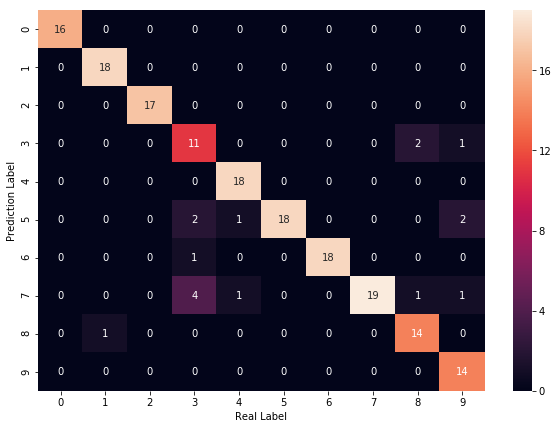

In [20]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [21]:
plt.hist(list_P)

(array([16., 18., 17., 14., 18., 23., 19., 26., 15., 14.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [22]:
plt.hist(digits.target[1617:])

(array([16., 19., 17., 18., 20., 18., 18., 19., 17., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [23]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))


#0 min_error:133 index:[5] real:5
#1 min_error:158 index:[2] real:2
#2 min_error:163 index:[8] real:8
#3 min_error:39 index:[0] real:0
#4 min_error:126 index:[1] real:1
#5 min_error:99 index:[7] real:7
#6 min_error:66 index:[6] real:6
#7 min_error:109 index:[3] real:3
#8 min_error:72 index:[2] real:2
#9 min_error:124 index:[1] real:1
#10 min_error:159 index:[7] real:7
#11 min_error:153 index:[7] real:4
#12 min_error:95 index:[6] real:6
#13 min_error:127 index:[3] real:3
#14 min_error:117 index:[1] real:1
#15 min_error:150 index:[3] real:3
#16 min_error:161 index:[7] real:9
#17 min_error:118 index:[1] real:1
#18 min_error:132 index:[7] real:7
#19 min_error:52 index:[6] real:6
#20 min_error:158 index:[8] real:8
#21 min_error:101 index:[4] real:4
#22 min_error:115 index:[3] real:3
#23 min_error:132 index:[1] real:1
#24 min_error:88 index:[4] real:4
#25 min_error:58 index:[0] real:0
#26 min_error:103 index:[5] real:5
#27 min_error:99 index:[3] real:3
#28 min_error:143 index:[6] real:6
#29 

In [24]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:8698 Total connections::8679


In [25]:
necoc = 511
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9115646258503401
Avg Base Learner:0.7840411382485747
